In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

def show_microbe():
    img1 = Image.open('microbe.jpg')
    plt.figure(figsize=(12,2))
    plt.imshow(img1)
    plt.axis('off')
    plt.show()
def show_pictures():
    img1 = Image.open('IMG_0190.jpg')
    img2 = Image.open('IMG_0388.jpg')
    plt.subplots(1,2,figsize=(12,4))
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

# Chapter 6,7 : Decision Tree

決定木を扱います。

### パリ楽しかったです

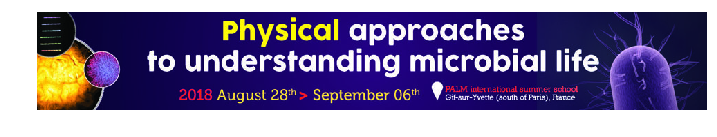

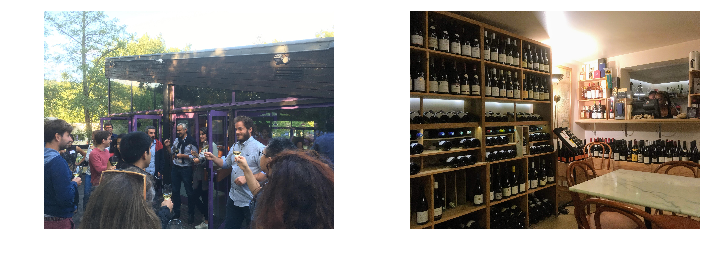

In [18]:
show_microbe()
show_pictures()

決定木でirisデータセットの classification を行う

In [87]:
def plot_iris():
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(frameon=False,fontsize=14)
    plt.show()

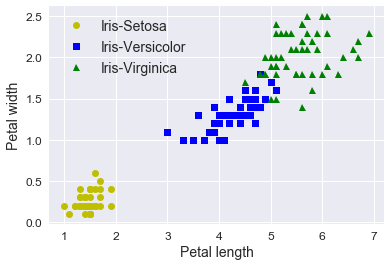

In [88]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

plot_iris()

In [89]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [75]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, Depth2=False,axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    #plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
    #plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
    #plt.text(1.2, 1.0, "Depth=0", fontsize=15)
    #plt.text(3.2, 1.80, "Depth=1", fontsize=15)
    if Depth2:
        plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
        plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
        plt.text(3.9, 0.5, "(Depth=2)", fontsize=11)
#save_fig("decision_tree_decision_boundaries_plot")

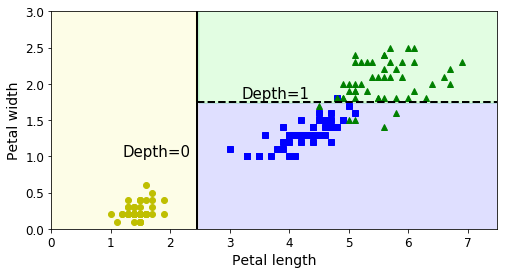

In [49]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

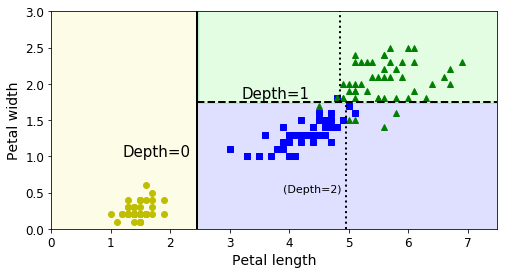

In [50]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, Depth2=True)

## Classification and Regression Tree (CART) 訓練アルゴリズム

特徴量 $k$ としきい値 $t_k$ のペアを以下のコスト関数(GINI impurity)が最小になるように選ぶ

$$
J(k,t_k) = \frac{m_{\rm left}}{m}G_{\rm left} + \frac{m_{\rm right }}{m}G_{\rm right },
$$
where
$$
G_i = 1-\sum^n_{k=1}p_{i,k}^2
$$


$p_{i,k}$: i番目の葉ノードにある訓練インスタンスのうち、クラスkのインスタンスの割合 

(同じインスタンスしか入ってないと $G_i =0$)
- scikit-learnでは binary tree しか作らない CART アルゴリズムになっている
- 最適な木を探すのはNP完全問題
- GINI impurity の代わりに Shannon entropy を使うのも可

## Regulatization hyperparameters

- 決定木のようにデータに対する仮定をほとんどおかないものを nonparametric model とよぶ
- 決定木は簡単にoverfittingを起こすので、regularize してあげないといけない
- scikit-learn では、
    - max_depth : tree の取れる最大の深さ
    - min_samples_leaf: 各leafノードにおける最低限のデータ数
    
などが指定できる

In [5]:
def plot_figure_6_3():
    plt.figure(figsize=(11, 4))
    plt.subplot(121)
    plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
    plt.title("No restrictions", fontsize=16)
    plt.subplot(122)
    plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
    plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
    plt.show()

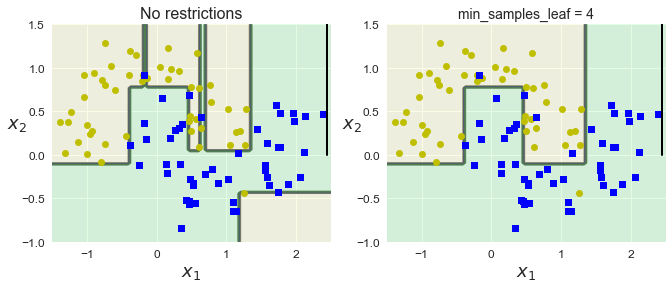

In [9]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plot_figure_6_3()

In [10]:
def plot_fig_6_7():
    plt.figure(figsize=(11, 4))
    plt.subplot(121)
    plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
    plt.subplot(122)
    plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
    plt.show()

decision tree は回転など、データのちょっとした違いに敏感である


↑PCA などで前処理してあげるとよい

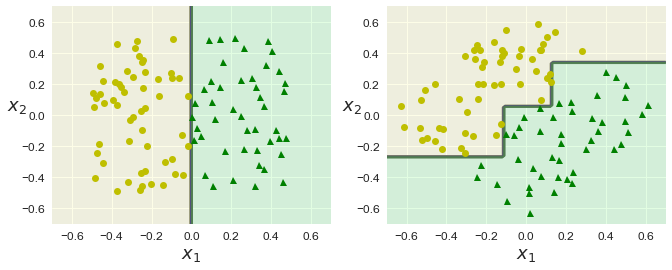

In [11]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)
plot_fig_6_7()

## Regression

GINI entropy の代わりにleaf node 毎に重みづけされた MSE を cost function とすることで、決定木で回帰を行うこともできる


$$
J(k,t_k) = \frac{m_{\rm left}}{m}{\rm MSE}_{\rm left} + 
\frac{m_{\rm right }}{m}{\rm MSE}_{\rm right }
$$


where
$$
{\rm MSE}_{\rm node} = \sum_{i\in{\rm node}} \left(\hat{y}_{\rm node}-y^{(i)}\right)
$$


$$
\hat{y}_{\rm node}=\frac{1}{m_{\rm node}}\sum_{i\in{\rm node}}y^{(i)}
$$

In [21]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    
def plot_fig_6_5():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_regression_predictions(tree_reg1, X, y)
    for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
        plt.plot([split, split], [-0.2, 1], style, linewidth=2)
    plt.text(0.21, 0.65, "Depth=0", fontsize=15)
    plt.text(0.01, 0.2, "Depth=1", fontsize=13)
    plt.text(0.65, 0.8, "Depth=1", fontsize=13)
    plt.legend(loc="upper center", fontsize=18)
    plt.title("max_depth=2", fontsize=14)

    plt.subplot(122)
    plot_regression_predictions(tree_reg2, X, y, ylabel=None)
    for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
        plt.plot([split, split], [-0.2, 1], style, linewidth=2)
    for split in (0.0458, 0.1298, 0.2873, 0.9040):
        plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
    plt.text(0.3, 0.5, "Depth=2", fontsize=13)
    plt.title("max_depth=3", fontsize=14)
    plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

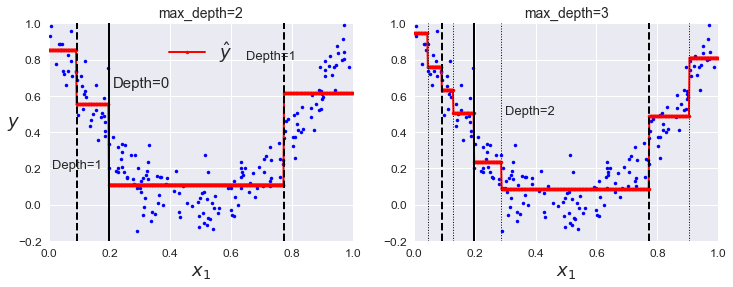

In [22]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

plot_fig_6_5()

In [33]:
def plot_fig_6_6():
    plt.figure(figsize=(16, 4))

    plt.subplot(121)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$",alpha=0.3)
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    plt.legend(loc="upper center", fontsize=18)
    plt.title("No restrictions", fontsize=14)

    plt.subplot(122)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$",alpha=0.3)
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

    plt.show()

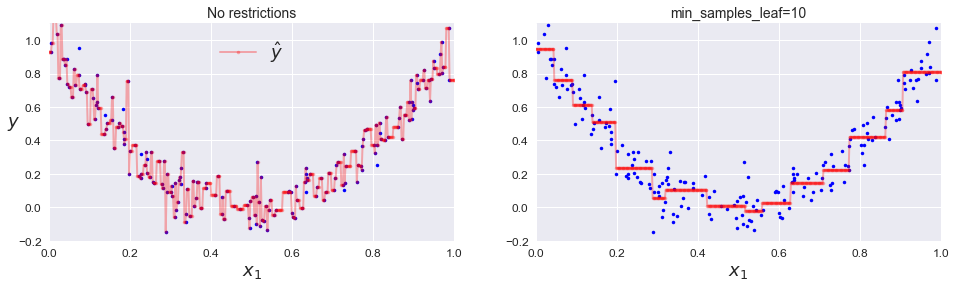

In [34]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plot_fig_6_6()

# Exercises 7&8



7: Train and fine-tune a Decision Tree for the moons dataset.

8: Grow a forest. 

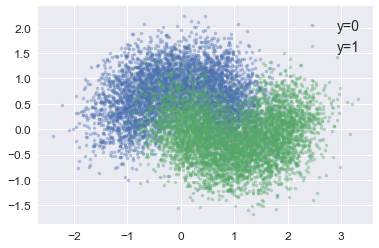

In [59]:
# 7a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0],'.',label='y=0',alpha=0.4)
plt.plot(X[:, 0][y==1], X[:, 1][y==1],'.',label='y=1',alpha=0.4)
plt.legend(fontsize=14)

In [58]:
# 7b. Split it into a training set and a test set using `train_test_split()`.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# 7c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) 
#     to find good hyperparameter values for a `DecisionTreeClassifier`.

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None

In [65]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [66]:
# 7d. Train it on the full training set using these hyperparameters

from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [77]:
# 8a. generate 1,000 subsets of the training set, each containing 100 instances selected randomly.

from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [83]:
# 8b. Train one Decision Tree on each subset, using the best hyperparameter values found above. 
#     Evaluate these 1,000 Decision Trees on the test set.

from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054494999999999

In [85]:
# 8c,d. For each test set instance, generate the predictions of the 1,000 Decision Trees, 
#       and keep only the most frequent prediction. Then evaluate the prediction.

from scipy.stats import mode

Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872